<a href="https://colab.research.google.com/github/HelaMasri/hadoop-cluster/blob/master/Preprocessing_tutorial.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Data preprocessing** is a technique that is used to transform raw data into an understandable format. Raw data often contains numerous errors (lacking attribute values or certain attributes or only containing aggregate data) and lacks consistency (containing discrepancies in the code) and completeness. This is where data preprocessing comes into the picture and provides a proven method of resolving such issues.

Steps involved in Data Preprocessing in Machine Learning
1.	Importing necessary libraries.
2.	Importing the data-set.
3.	Checking and handling the missing values.
4.	Encoding Categorical Data.
5.	Feature Scaling.


# Importing necessary libraries

Python has a list of amazing libraries and modules which help us in the data preprocessing process. Therefore in order to implement data preprocessing the first and foremost step is to import the necessary/required libraries.
The libraries that we will be using in this tutorial are:
**NumPy**
NumPy is a Python library that allows you to perform numerical calculations. Think about linear algebra in school (or university) – NumPy is the Python library for it. It’s about matrices and vectors – and doing operations on top of them. At the heart of NumPy is a basic data type, called NumPy array. 
The NumPy API can be referenced [here](https://numpy.org/doc/stable/reference/index.html).

**Pandas**
The Pandas library is the fundamental high-level building block for performing practical and real-world data analysis in Python. The Pandas library will not only allow us to import the data sets but also create the matrix of features and the dependent variable vector.
The panda API can be referenced [here](https://pandas.pydata.org/docs/reference/index.html).

**Matplotlib**
The Matplotlib library allows us to plot some awesome charts which is a major requirement in Machine Learning.

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


# Importing The Dataset and exploring the data


Once we have successfully imported all the required libraries, we then need to import the required dataset. For this purpose, we will be using the pandas library.





 Let's read the data (using read_csv), and take a look at the first 5 lines using the head method:

In [34]:
from google.colab import files
uploaded = files.upload()
dataset = pd.read_csv('data.csv')
dataset.head()



Saving data.csv to data (3).csv


,Country,Age,Salary,Purchased
0,France,44.0,72000.0,No
1,Spain,27.0,48000.0,Yes
2,Germany,30.0,54000.0,No
3,Spain,38.0,61000.0,No
4,Germany,40.0,NaN,Yes


Let’s have a look at data dimensionality, feature names, and feature types.



In [8]:
print(dataset.shape)

(10, 4)


From the output, we can see that the table contains 10 rows and 4 columns.

Now let's try printing out column names using columns:

In [9]:
print(dataset.columns)

Index(['Country', 'Age', 'Salary', 'Purchased'], dtype='object')


We can use the info() method to output some general information about the dataframe:

In [11]:
print(dataset.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Country    10 non-null     object 
 1   Age        9 non-null      float64
 2   Salary     9 non-null      float64
 3   Purchased  10 non-null     object 
dtypes: float64(2), object(2)
memory usage: 448.0+ bytes
None


The **describe** method shows basic statistical characteristics of each numerical feature (int64 and float64 types): number of non-missing values, mean, standard deviation, range, median, 0.25 and 0.75 quartiles.

In [12]:
dataset.describe()

,Age,Salary
count,9.000000,9.000000
mean,38.777778,63777.777778
std,7.693793,12265.579662
min,27.000000,48000.000000
25%,35.000000,54000.000000
50%,38.000000,61000.000000
75%,44.000000,72000.000000
max,50.000000,83000.000000


In order to see statistics on non-numerical features, one has to explicitly indicate data types of interest in the include parameter.



In [13]:
dataset.describe(include=['object', 'bool'])

,Country,Purchased
count,10,10
unique,3,2
top,France,Yes
freq,4,5


The **matrix of features** is used to describe the list of columns containing the **independent variables** to be processed and includes all lines in the given dataset.
The **target variable** vector used to define the list of **dependent** variables in the existing dataset.
**iloc** is an indexer for the Pandas Dataframe that is used to select rows and columns by their location/position/index.

In [35]:
x = dataset.iloc[:,:-1].values
y = dataset.iloc[:,-1].values
print(x)
print(y)

[['France' 44.0 72000.0]
 ['Spain' 27.0 48000.0]
 ['Germany' 30.0 54000.0]
 ['Spain' 38.0 61000.0]
 ['Germany' 40.0 nan]
 ['France' 35.0 58000.0]
 ['Spain' nan 52000.0]
 ['France' 48.0 79000.0]
 ['Germany' 50.0 83000.0]
 ['France' 37.0 67000.0]]
['No' 'Yes' 'No' 'No' 'Yes' 'Yes' 'No' 'Yes' 'No' 'Yes']


# Handling The Missing Values
While dealing with datasets, we often encounter missing values which might lead to incorrect deductions. Thus it is very important to handle missing values.

There are couple of ways in which we can handle the missing data.

**Method 1**: Delete The Particular Row Containing Null Value
Drop the rows where at least one element is missing:

dataset.dropna(inplace="true")

This method is advised only when there are enough samples in the data set. One has to make sure that after we have deleted the data, there is no addition of bias. Removing the data will lead to loss of information which will not give the expected results while predicting the output.

**Method 2** Method 2: Replacing The Missing Value With The Mean, Mode, or Median
This strategy is best suited for features that have numeric data. We can simply calculate either of the mean, median, or mode of the feature and then replace the missing values with the calculated value. In our case, we will be calculating the mean to replace the missing values. Replacing the missing data with one of the above three approximations is also known as leaking the data while training.

➥ To deal with the missing values we need the help of the SimpleImputer class of the scikit-learn library.




In [15]:
dataset.isnull().sum()

Country      0
Age          1
Salary       1
Purchased    0
dtype: int64

In [ ]:
x

In [28]:
print(dataset['Age'].mean())
dataset


38.77777777777778


,Country,Age,Salary,Purchased
0,France,44.0,72000.0,No
1,Spain,27.0,48000.0,Yes
2,Germany,30.0,54000.0,No
3,Spain,38.0,61000.0,No
4,Germany,40.0,NaN,Yes
5,France,35.0,58000.0,Yes
6,Spain,NaN,52000.0,No
7,France,48.0,79000.0,Yes
8,Germany,50.0,83000.0,No
9,France,37.0,67000.0,Yes


In [36]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(missing_values=np.nan, strategy='mean')
imputer.fit(x[:, 1:3])
x[:, 1:3] = imputer.transform(x[:, 1:3])
print(x)

[['France' 44.0 72000.0]
 ['Spain' 27.0 48000.0]
 ['Germany' 30.0 54000.0]
 ['Spain' 38.0 61000.0]
 ['Germany' 40.0 63777.77777777778]
 ['France' 35.0 58000.0]
 ['Spain' 38.77777777777778 52000.0]
 ['France' 48.0 79000.0]
 ['Germany' 50.0 83000.0]
 ['France' 37.0 67000.0]]


# Encoding Categorical Data
Since, most of the machine learning models are based on Mathematical equations and you can intuitively understand that it would cause some problem if we can keep the Categorical data in the equations because we would only want numbers in the equations.
So, we need to encode the Categorical Variable.

Like in our data set Country column will cause problem, so will convert into numerical values. To convert Categorical variable into Numerical data we can use **LabelEncoder() **class from preprocessing library.

In [40]:
from sklearn.preprocessing import LabelEncoder,OneHotEncoder

In [32]:

le_X = LabelEncoder()
x[:,0] = le_X.fit_transform(x[:,0])

In [ ]:
x


**One-Hot Encoding**
One hot encoding takes a column that has categorical data and then splits the column into multiple columns. Depending on which column has what value, they are replaced by 1s and 0s.

In our example, we will get three new columns, one for each country — India, Germany, and Japan. For rows with the first column value as Germany, the ‘Germany’ column will be split into three columns such that, the first column will have ‘1’ and the other two columns will have ‘0’s. Similarly, for rows that have the first column value as India, the second column will have ‘1’ and the other two columns will have ‘0’s. And for rows that have the first column value as Japan, the third column will have ‘1’ and the other two columns will have ‘0’s.

➥ To implement One-Hot Encoding we need the help of the OneHotEncoder class of the scikit-learn libraries’ preprocessing module and the ColumnTransformer class of the compose module.

In [49]:
from sklearn.compose import ColumnTransformer 
ct = ColumnTransformer([('encoder', OneHotEncoder(),[0])], remainder="passthrough") # The last arg ([0]) is the list of columns you want to transform in this step
x =np.array(ct.fit_transform(x))
x

array([[1.0, 0.0, 0.0, 44.0, 72000.0],
       [0.0, 0.0, 1.0, 27.0, 48000.0],
       [0.0, 1.0, 0.0, 30.0, 54000.0],
       [0.0, 0.0, 1.0, 38.0, 61000.0],
       [0.0, 1.0, 0.0, 40.0, 63777.77777777778],
       [1.0, 0.0, 0.0, 35.0, 58000.0],
       [0.0, 0.0, 1.0, 38.77777777777778, 52000.0],
       [1.0, 0.0, 0.0, 48.0, 79000.0],
       [0.0, 1.0, 0.0, 50.0, 83000.0],
       [1.0, 0.0, 0.0, 37.0, 67000.0]], dtype=object)

# Feature Scaling

Feature scaling is the method to limit the range of variables so that they can be compared on common grounds.
See the Age and Salary column. You can easily noticed Salary and Age variable don’t have the same scale and this will cause some issue in your machine learning model.

Let’s say we take two values from Age and Salary column
Age- 40 and 27
Salary- 72000 and 48000



One can easily compute and see that age column will be dominated.
So, there are several ways of scaling your data. 
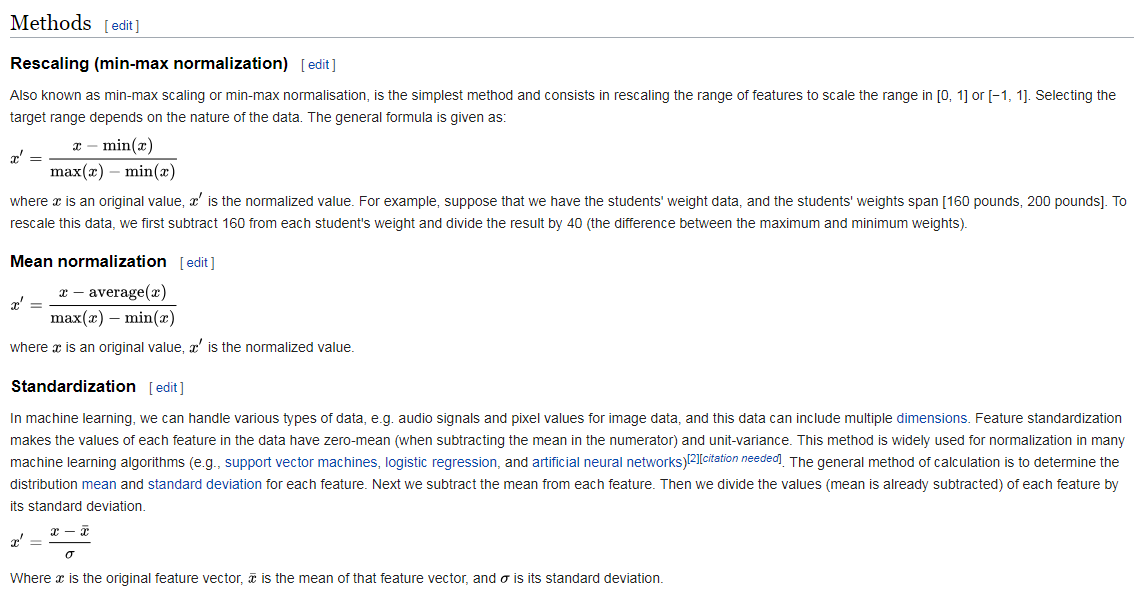



Since machine learning models rely on numbers to solve relations it is important to have similarly scaled data in a dataset. Scaling ensures that all data in a dataset falls in the same range.Unscaled data can cause inaccurate or false predictions.Some machine learning algorithms can handle feature scaling on its own and doesn’t require it explicitly.

As an example we give the code of the 3rd scalling method. We need to import the StandardScaler class of the scikit-learn library.
Then we create the object of StandardScaler class.
After that, we fit and transform the dataset 


In [51]:

from sklearn.preprocessing import StandardScaler

sc = StandardScaler()

x[:, 3:] = sc.fit_transform(x[:, 3:])
x

array([[1.0, 0.0, 0.0, 0.758874361590019, 0.7494732544921677],
       [0.0, 0.0, 1.0, -1.7115038793306814, -1.4381784072687531],
       [0.0, 1.0, 0.0, -1.2755547779917342, -0.8912654918285229],
       [0.0, 0.0, 1.0, -0.1130238410878753, -0.253200423814921],
       [0.0, 1.0, 0.0, 0.17760889313808945, 6.632191985654332e-16],
       [1.0, 0.0, 0.0, -0.5489729424268225, -0.5266568815350361],
       [0.0, 0.0, 1.0, 0.0, -1.0735697969752662],
       [1.0, 0.0, 0.0, 1.3401398300419485, 1.3875383225057696],
       [0.0, 1.0, 0.0, 1.6307725642679132, 1.7521469327992565],
       [1.0, 0.0, 0.0, -0.2583402082008577, 0.29371249162530916]],
      dtype=object)